# UFO Sightings Through the Data Science Pipeline 

By Melissa Chen and Andrea Soto

## Introduction

Most of us do not realize that data science plays a role in various aspects of our daily lives. For example, data sience can have applications in the areas of marketing and advertising, healthcare, government, image recognition, cybersecuirty and many more. Data science is a rapidly rising, interdisciplinary field that involves an understanding of various scientific, mathematical, computational and design techniques in order to extract insight from large amounts of data to solve real world problems. More and more industries are noticing the importance of this field for making smart, informed, and even profitable everyday decisions. Since there is an increasing need for knowledgeable and able data scientists, it is important for more people to acquire the necessary skills so that they can confidently enter this exciting and growing field. 

In this introductory tutorial we will choose a dataset and walk through the steps of the data science pipeline in manner that is easy to understand and follow. The pipeline consists of the following steps: 

1. Data Collection 
2. Data Processing 
3. Exploratory Analysis and Visualization 
4. Hypothesis Testing and Machine Learning 
5. Insight and Policy 

This tutorial can help those with an understanding of scripting languages but who are new to the data science methodology as a whole. It can also help more experieced data scientists who are perhaps unfamiliar with Python and the various libraries availble that simplify the data analysis process.

By the end of the tutorial, you will have learned how to search for and derive meaningful information from a large dataset and convey your findings in a visually, insightful way.

## Table of Contents:

1. [Lab Set-Up](#lab)
2. [Motivation](#mot)
3. [Data Collection](#coll)
4. [Data Processing](#proc)
5. [Exploratory Data Analysis and Visualization](#expl)
6. [Hypothesis Testing and Machine Learning](#hyp)
7. [Insights](#ins)
8. [Summary](#sum)

## Lab Set-Up
<a id='lab'></a>

First we need to set up your machine. The easiest way to do this is to download [Anaconda](https://www.anaconda.com/download/#macos), a popular Python data science platform, with Python version 3.6. We recommend using [Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/) to create documents where you can run your code and easily view data visualizations. This open-source application makes it especially easy for beginners to learn and comes with the Anaconda package. Simply run the command `jupyter notebook` in the OSX/Linux terminal or Windows Command Prompt to launch the Jupyter interface. Jupyter allows the use of [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) language to easily document your code and make your documents more presentable. 

Create a new directory for this tutorial and within it, create a jupyter notebook and download the [UFO Sightings](https://www.kaggle.com/NUFORC/ufo-sightings/) dataset. We will be using the following Python libraries:

1. [Pandas](https://pandas.pydata.org/pandas-docs/stable/)
2. [Numpy](https://docs.scipy.org/doc/numpy/)
3. [Matplotlib](https://matplotlib.org/)
4. [Seaborn](https://seaborn.pydata.org/)
5. [sklearn](http://scikit-learn.org/stable/)
6. [Folium](https://github.com/python-visualization/folium)
7. [Wordcloud](https://amueller.github.io/word_cloud/)

Folium is not included with the Anaconda package so you will have to install it by running the `pip install folium` command in the terminal/command prompt. Below shows the proper way to import all the necessary libraries.

In [5]:
#!pip install folium
#!pip install wordcloud
import folium
import requests
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
import sklearn.metrics as skl

## Motivation for Analyzing UFO Sightings Data
<a id='mot'></a>

Many of us think about the possibility of life existing elsewhere in the universe and though we often hear about people seeing UFOs, we don't usually think of this as something we can analyze computationally. With this dataset, we have access to thousands of UFO sighting reports with attributes such as data and time of sighting, state, country, latitude and longitude, and duration of sighting. With these kind of data, we could start asking some interesting questions. For example:

- In what areas of the country or at what times of day are we most likely to witness UFOs?
- Is there a relationship between shape of the UFO and state, or country, or some other attribute?
- How has the number of UFO sightings changed overtime?

If we can find certain areas that are more particularly prone to UFO sightings or other hidden trends, it could help us predict when the next UFO sightings will happen. This could help us be more prepared to gather better evidence when these events occur and ultimately get closer to discovering other life forms. 

## Data Collection
<a id='coll'></a>

Before we collect data, we need to think about what topics are of interest and what types of problems we want to solve. There are five ways to collect data: 

- Directly downloading a dataset and loading it from local storage
- Generate data locally through downloaded code
- Query data from a database
- Query an online API(application programming interface)
- Scrape data from a website

Datasets are commonly formatted as comma-separated value (CSV) files, Javascript Object Notation (JSON) files, HTML, XHTML, or XML files. Python can easily work with any of these file types to easily transform the data into a workable format. 

As a new data scientist, you will need to practice the techniques showed in this tutorial. Thankfully, there are many sources online from which we can download datasets for free in order to practice. You also want to make sure that the data you choose is from reliable source so that you can make accurate predictions about the data. Check out the following reputable sources:

- [Kaggle](https://www.kaggle.com/)
- [UCI Maching Learning Repository](http://archive.ics.uci.edu/ml/index.php)
- [Socrata](https://opendata.socrata.com/)
- [Amazon Web Services Public Data Sets](https://aws.amazon.com/public-datasets/)
- [Google Public Datasets](https://cloud.google.com/bigquery/public-data/)
- [Wikipedia Databases](https://en.wikipedia.org/wiki/Wikipedia:Database_download)
- [Data World](https://data.world/)

<b>FILL THIS OUT: In this tutorial we are using a dataset from -- in -- format. The following code shows how we load the data into the jupyter notebook.</b>

In [7]:
# Load dataset here
# set low_memory becuase there are mix type in column duration and longtitude
df = pd.read_csv('scrubbed.csv',low_memory=False)

## Data Processing
<a id='proc'></a>

Now that we have loaded the data, we need to tidy it up. At larger scales, the majority of our time could be spent in the data processing phase because raw datasets are often times messy and incomplete. Therefore we want to clean and organize the data before we start any analysis to minimize errors or inaccuracies and simplify the next steps of the pipeline. 

We want to check the data for missing values and either drop the corresponding rows or columns, or put in some value. Then we want to refine the data further by dropping the rows or cols of data we don't need. For example, maybe we're only interested in data from certain years, or data from certain states. We can filter our data to be more concise and dense.  

In [8]:
# clean up the unknown entries
df = df.replace('unknown', np.NaN)
# drop
df = df.drop('duration (hours/min)',axis= 1)
df = df.drop('date posted',axis=1)
df = df.drop('comments',axis=1)
# rename: make the name shorter and easier to call later
df = df.rename(columns = {'duration (seconds)':'duration'})
df = df.rename(columns = {'latitude':'lat'})

# get ride of the space in our header
df = df.rename(columns = {'longitude ':'long'})

# convert to numerical number, fix mix type issue
#df['lat']=pd.to_numeric(df['lat'])
df['duration'] = df.duration.str.extract('(\d+)', expand=True).astype(int)
df['lat'] = df.lat.str.extract('(\d+\.\d+)', expand=True).astype(float)

# get rid of space in column 
df['state'] = df.state.str.extract('(\w+)', expand=True).astype(str)
df['shape'] = df['shape'].str.extract('(\w+)', expand=True).astype(str)
df['state'] = df['state'].str.replace(" ","")
df['shape']=df['shape'].str.replace(" ","")

#deal with the time 
df['datetime'] = df['datetime'].replace('24:00','00:00',regex=True)

# convert the date time value
df['datetime']= pd.to_datetime(df['datetime'],format='%m/%d/%Y %H:%M')

# extract hour from datetime value
hours=df['datetime'].dt.hour
df['datetime_hour'] = hours
df['datetime_year'] = df['datetime'].dt.year
df['datetime_month'] = df['datetime'].dt.month
df['datetime_day'] = df['datetime'].dt.day

#df.head()

## Exploratory Data Analysis and Visualization
<a id='expl'></a>

Exploratory data analysis is used to obtain a deeper understand of the dataset we are using. It involves delving into the data in search of interesting relationships between variables, skew, trends, or any issues with the data. We can start this exploration by performing some simple summary statistics such as mean, median, and standard deviation. We can also use EDA to prepare the data for modeling and visualizations so that we can easily view distributions and any patterns. For more information on exploratory data analysis check out this tutorial on [Data Camp](https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python).


 ### Mean, median and sd for viewing duration

In [9]:
# Average duration in second
print("average duration in seconds:",df["duration"].mean())

average duration in seconds: 9016.887641288653


In [10]:
print("median duration in seconds:",df["duration"].median())

median duration in seconds: 180.0


In [11]:
print("standard deviation in seconds:",df["duration"].std())

standard deviation in seconds: 620216.7903114079


### Corrolation

In [56]:
df_count = df.groupby(['datetime_year','datetime_month','datetime_hour']).size().reset_index(name='counts')
df_count.head()

,datetime_year,datetime_month,datetime_hour,counts
0,1906,11,0,1
1,1910,1,0,1
2,1910,6,15,1
3,1916,4,13,1
4,1920,6,21,1


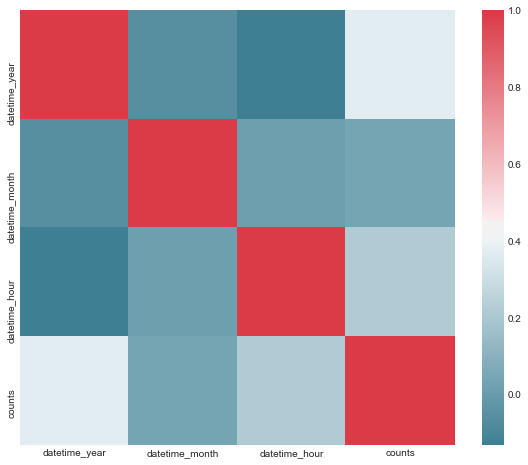

In [58]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_count.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

### Line Graphs

In [59]:
df_count_year = df.groupby(['datetime_year']).size().reset_index(name='counts')
df_count_year.head()

,datetime_year,counts
0,1906,1
1,1910,2
2,1916,1
3,1920,1
4,1925,1


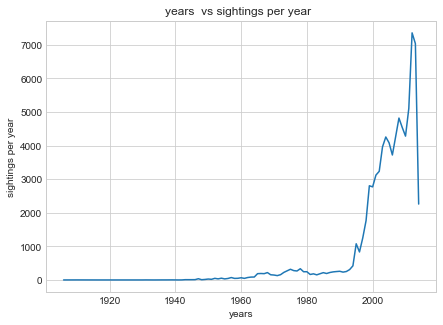

In [60]:
plt.plot(df_count_year['datetime_year'], df_count_year['counts'])
plt.title('years  vs sightings per year  ')
plt.ylabel('sightings per year')
plt.xlabel('years')
plt.show()

In [61]:
df_count_month = df.groupby(['datetime_month']).size().reset_index(name='counts')
df_count_month.head()

,datetime_month,counts
0,1,5689
1,2,4665
2,3,5450
3,4,5527
4,5,5293


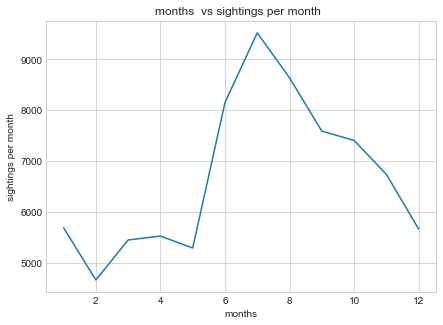

In [62]:
plt.plot(df_count_month['datetime_month'], df_count_month['counts'])
plt.title('months  vs sightings per month  ')
plt.ylabel('sightings per month')
plt.xlabel('months')
plt.show()

In [63]:
df_count_hour = df.groupby(['datetime_hour']).size().reset_index(name='counts')
df_count_hour.head()

,datetime_hour,counts
0,0,4802
1,1,3210
2,2,2357
3,3,2004
4,4,1529


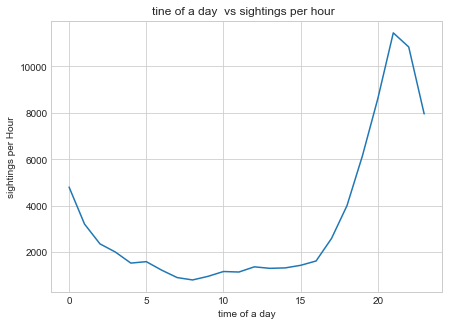

In [64]:
plt.plot(df_count_hour['datetime_hour'], df_count_hour['counts'])
plt.title('tine of a day  vs sightings per hour  ')
plt.ylabel('sightings per Hour')
plt.xlabel('time of a day')
plt.show()

### Violin Plots

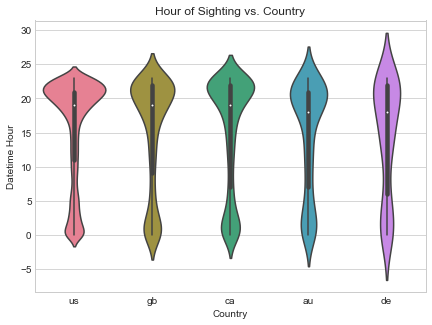

In [44]:
df_country = df[(df.country == "us") | (df.country == "gb") | (df.country == "ca") 
                | (df.country == "au")| (df.country == "de") | ((df.datetime_hour >= 0) & (df.datetime_hour <=24))]
sns.set_style("whitegrid")
sns.violinplot("country", "datetime_hour", palette='husl',showextrema=False, data=df_country);
plt.rcParams["figure.figsize"] = (7,5)
plt.title('Hour of Sighting vs. Country')
plt.xlabel('Country')
plt.ylabel('Datetime Hour')
plt.show()

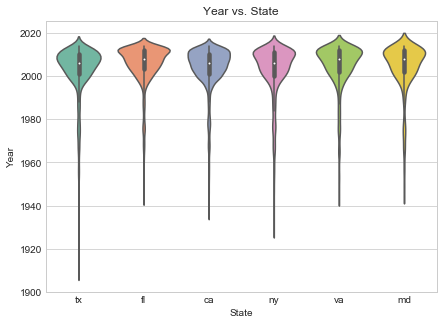

In [45]:
df_states = df[ (df.state == "md") | (df.state == "va") | (df.state == "ny") | (df.state == "ca")
           | (df.state == "fl") | (df.state == "tx")]
sns.set_style("whitegrid")
sns.violinplot("state", "datetime_year", palette='Set2', data=df_states);
plt.title('Year vs. State')
plt.xlabel('State')
plt.ylabel('Year')
plt.show()

### Bar Plot

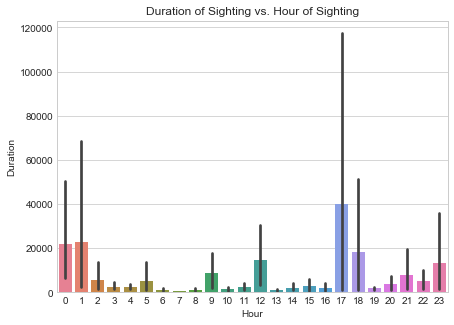

In [46]:
sns.set_style("whitegrid")
vioplt = sns.barplot(x="datetime_hour", y="duration", data=df, palette="husl")
vioplt.set_title('Duration of Sighting vs. Hour of Sighting')
vioplt.set_xlabel('Hour')
vioplt.set_ylabel('Duration')
plt.show()

###  Word Clouds

The clouds give greater prominence to words that appear more frequently in the source text.

For more information: https://github.com/amueller/word_cloud  

In [34]:
from wordcloud import WordCloud, STOPWORDS
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
import random

In [114]:
def drawCloud(text):
    text = text+" "+"STOP"
    wordcloud = WordCloud(
                      background_color="white",
                      relative_scaling = 1.0,
                    stopwords="STOP",
                    collocations = False,
                      ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

##### Word Cloud on Shape

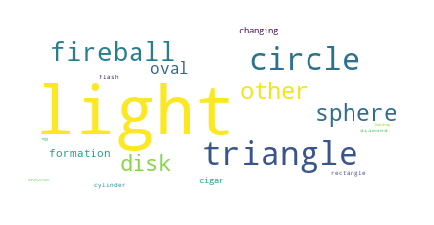

In [115]:
makeitastring = ' '.join(map(str, df['shape']))
makeitastring = makeitastring.replace('nan ', '')
#makeitastring = makeitastring.replace('light ', 'light')
drawCloud(makeitastring)

Circle, sphere, triangle and oval are the most seen UFO shape.

##### Word Cloud on State

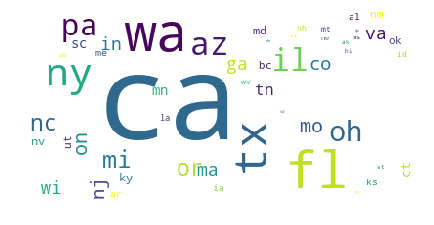

In [116]:
makeitastring1 = ' '.join(map(str, df['state']))
makeitastring1 = makeitastring1.replace('nan ', '')
drawCloud(makeitastring1)

Most reports are from Californaia, Florida, Washington and Texas,etc.

### Map Analysis
##### DBscan 
Fine out the most popular spots(centroids) for seasons

In [47]:
spring= df[(df['datetime_month'] <=3) ]
print (len(spring))
summer = df[(df['datetime_month'] >3) & (df['datetime_month'] <= 6) ]
print (len(summer))
fall = df[(df['datetime_month'] >=7) & (df['datetime_month'] <10) ]
print (len(fall))
winter = df[(df['datetime_month'] >=10)]
print (len(winter))

15804
18972
25745
19811


Below is DB scan algorithm for analyzing the data. 

Check out the DBscan idea from:http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

In [48]:
#This method is going to return a panda dataFrame called centroids. 
def DBscan(dataset):
    #define the needed pram for DBscan. 
    kms_per_radian = 6371.0088       
    epsilon = 0.5 / kms_per_radian
    minSamples = 100     
    coordinates=dataset[['lat','long']].values
    
    #DBscan 
    db = DBSCAN(eps=epsilon, min_samples=minSamples, algorithm='ball_tree', metric='haversine').fit(np.radians(coordinates))
    y = db.labels_
    centroids = pd.DataFrame(columns=['lat','lon'])
    X = pd.DataFrame(coordinates, columns=['lat','lon'])
    Y = pd.DataFrame(y, columns=['label'])
    res = pd.concat([X,Y], axis=1, join='inner')
    n_clusters = len(set(res['label'])) - (1 if -1 in set(res['label']) else 0)

    for i in range(n_clusters):
        el = res[res['label'] == i].mean(axis=0).drop('label')
        centroids = centroids.append(el, ignore_index=True)

    return centroids

In [49]:
spring = spring.dropna(how='any')
summer = summer.dropna(how='any')
fall = fall.dropna(how='any')
winter = winter.dropna(how='any')

springcentroids = DBscan(spring)
summercentroids = DBscan(summer)
fallcentroids = DBscan(fall)
wintercentroids = DBscan(winter)

print (len(springcentroids),'\n',springcentroids,'\n')
print (len(summercentroids),'\n',summercentroids,'\n')
print (len(fallcentroids),'\n',fallcentroids,'\n')
print (len(wintercentroids),'\n',wintercentroids,'\n')

2 
          lat         lon
0  33.448333 -112.073333
1  47.606389 -122.330833 

4 
          lat         lon
0  47.606389 -122.330833
1  36.175000 -115.136389
2  33.448333 -112.073333
3  40.714167  -74.006389 

8 
          lat         lon
0  40.714167  -74.006389
1  29.763056  -95.363056
2  32.715278 -117.156389
3  45.523611 -122.675000
4  47.606389 -122.330833
5  36.175000 -115.136389
6  34.052222 -118.242778
7  41.850000  -87.650000 

5 
          lat         lon
0  32.715278 -117.156389
1  47.606389 -122.330833
2  33.448333 -112.073333
3  34.052222 -118.242778
4  40.714167  -74.006389 



In [51]:
m = folium.Map(location=[48, -102], zoom_start=2)

### draw the centroids method 
### It will lable the centroids in our map
def drawcentroids(centroids,colorsList):
    centCoordinates = centroids[['lat','lon']].values
    for i,r in enumerate(centCoordinates):
        color = i
        folium.Marker(
            location=[r[0], r[1]],
            icon=folium.Icon(color=colorsList[color])
        ).add_to(m)        

ScolorsList = ['darkred','darkred']
drawcentroids(springcentroids,ScolorsList)

SumcolorsList = ['darkgreen','darkgreen','darkgreen','darkgreen']
drawcentroids(summercentroids,SumcolorsList)

FallcolorsList = ['dakrpurple','darkpurple','darkpurple','darkpurple','darkpurple','darkpurple','darkpurple','darkpurple']
drawcentroids(fallcentroids,FallcolorsList)

WcolorsList = ['black','black','black','black','black']
drawcentroids(wintercentroids,WcolorsList)
m

In [52]:
from folium import plugins
# extract lat, lon, and magnitude for the folium heatmap
# since we want to find out the maginitue(count) in certain area, so we are going to round the lat and long to 3 digits
df['lat']=pd.to_numeric(df['lat'])
df['long']=pd.to_numeric(df['long'])
df = df.round({'lat':3, 'long':3})
heat_df = pd.DataFrame(df.groupby(['lat', 'long']).size().reset_index(name='counts')) 
heat_df.head()

,lat,long,counts
0,0.024,37.906,1
1,0.181,-78.468,5
2,0.590,101.343,1
3,0.756,33.438,1
4,0.789,113.921,1


In [53]:
heat_map = plugins.HeatMap(list(zip(heat_df['lat'], heat_df['long'], heat_df['counts'])), radius = 10)
m.add_child(heat_map)

##### Number of Sightings in 2014 by State

In [111]:
df_2014= df[(df['datetime_year'] ==2014) & (df['country'] =='us')]
df_count_state = df_2014.groupby(['state']).size().reset_index(name='counts')

# Get an average lat-long for each state
aveLatLongs = df_2014.groupby(['state'])['lat','long'].mean()
aveLatLongs = aveLatLongs.reset_index()

# Merge the arrest counts with the lat-longs for each neighborhood
merged = pd.merge(aveLatLongs, df_count_state, how='left', on=['state'])
merged.head()

,state,lat,long,counts
0,ak,60.453652,-149.110652,23
1,al,33.106442,-86.989512,43
2,ar,35.305500,-92.941750,8
3,az,33.303949,-111.959153,98
4,ca,35.798615,-119.534766,265


In [112]:
# Create map object
map_osm = folium.Map(location=[43, -100],tiles='Stamen Toner', zoom_start=4)
# Create marker specifying its location, a popup string, and marker color for each state
# Adds each marker to the map and then displays the entire map
for each in merged.iterrows():
    color = "blue"
    folium.Marker(
        location=[each[1]['lat'],each[1]['long']],
        popup=folium.Popup("Number of sightings: " + str(each[1]['counts']), parse_html=True),
        icon=folium.Icon(color=color)).add_to(map_osm)
display(map_osm)

## Hypothesis Testing and Machine Learning
<a id='hyp'></a>



## Insights
<a id='ins'></a>

## Summary
<a id='sum'></a>